In [1]:
!pip install kaggle

Importing Face Mask Dataset

In [2]:
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 99% 161M/163M [00:04<00:00, 43.3MB/s]
100% 163M/163M [00:04<00:00, 37.7MB/s]


In [3]:
from zipfile import ZipFile

dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


**Importing the Dependencies**

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [5]:
with_mask_files = os.listdir('/content/data/with_mask')
without_mask_files = os.listdir('/content/data/without_mask')

In [6]:
with_mask_files[:5]

['with_mask_3520.jpg',
 'with_mask_1242.jpg',
 'with_mask_3717.jpg',
 'with_mask_1875.jpg',
 'with_mask_393.jpg']

In [7]:
without_mask_files[:5]

['without_mask_374.jpg',
 'without_mask_3289.jpg',
 'without_mask_2763.jpg',
 'without_mask_2332.jpg',
 'without_mask_107.jpg']

In [8]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


**Creating Labels for the two class of Images**

with mask  -->  1

without mask  -->  0

In [9]:
with_mask_labels = [1]*3725
without_mask_labels = [0]*3828

In [10]:
without_mask_labels[:5]

[0, 0, 0, 0, 0]

In [11]:
with_mask_labels[:5]

[1, 1, 1, 1, 1]

In [12]:
labels = with_mask_labels+without_mask_labels
len(labels)

7553

**Displaying the Images**

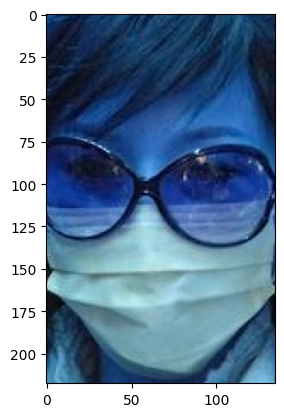

In [13]:
img = '/content/data/with_mask/with_mask_10.jpg'
img = cv2.imread(img)
plt.imshow(img)

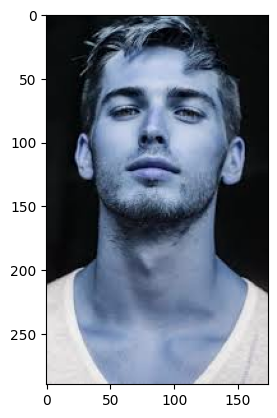

In [14]:
img = '/content/data/without_mask/without_mask_1066.jpg'
img = cv2.imread(img)
plt.imshow(img)

**Image Processing**

1. Resize the Images

2. Convert the images to numpy arrays

In [15]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)         #openng the img
  image = image.resize((128,128))             # resize the image
  image = image.convert('RGB')      # converting red green and blue
  image = np.array(image)       # convert img. in array
  data.append(image)        # append the data into data



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [16]:
len(data)

7553

array([[[153, 151, 134],
        [154, 152, 135],
        [153, 151, 134],
        ...,
        [181, 180, 158],
        [182, 180, 159],
        [182, 180, 159]],

       [[153, 151, 134],
        [154, 151, 134],
        [153, 151, 134],
        ...,
        [180, 178, 156],
        [181, 179, 158],
        [182, 180, 159]],

       [[154, 151, 134],
        [154, 151, 134],
        [154, 152, 135],
        ...,
        [179, 178, 157],
        [180, 179, 158],
        [180, 179, 158]],

       ...,

       [[209,  71,  60],
        [213,  72,  63],
        [214,  73,  63],
        ...,
        [ 11,   6,   4],
        [  7,   3,   3],
        [  6,   2,   2]],

       [[214,  72,  64],
        [218,  76,  66],
        [217,  75,  64],
        ...,
        [ 15,  10,   6],
        [ 12,   7,   4],
        [  9,   4,   3]],

       [[214,  73,  64],
        [219,  77,  68],
        [219,  76,  67],
        ...,
        [ 15,   9,   4],
        [ 20,  13,   8],
        [ 15,   8,   5]]], dtype=uint8)
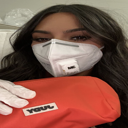

In [17]:
data[0]

array([[[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[27, 27, 27],
        [37, 37, 37],
        [47, 47, 47],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       ...,

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 8,  8,  8],
        [ 6,  6,  6],
        [ 2,  3,  3]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]]], dtype=uint8)
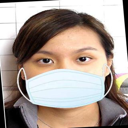

In [18]:
data[3]

In [19]:
# converting image list and label list to numpy arrays
x = np.array(data)
y = np.array(labels)

In [20]:
x.shape

(7553, 128, 128, 3)

**Train Test Split**

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [22]:
# scaling the data

X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [23]:
X_train_scaled[0]

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]])

**Building a Convolutional Neural Networks (CNN)**

In [24]:
import tensorflow as tf
from tensorflow import keras

In [25]:
num_of_classes = 2

model = keras.Sequential()

# kernel_size=(3, 3): Size of the convolution kernel.
# input_shape=(height, width, channels)
# MaxPooling2D - this layer is added after a convolutional layer to reduce the spatial dimensions of the feature maps
# -and control overfitting by reducing the number of parameters.
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
# It's a common practice to use dropout after fully connected (dense) layers
# or sometimes after convolutional layers to improve generalization.
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       7,372,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,400,706 (28.23 MB)

 Trainable params: 7,400,706 (28.23 MB)

 Non-trainable params: 0 (0.00 B)

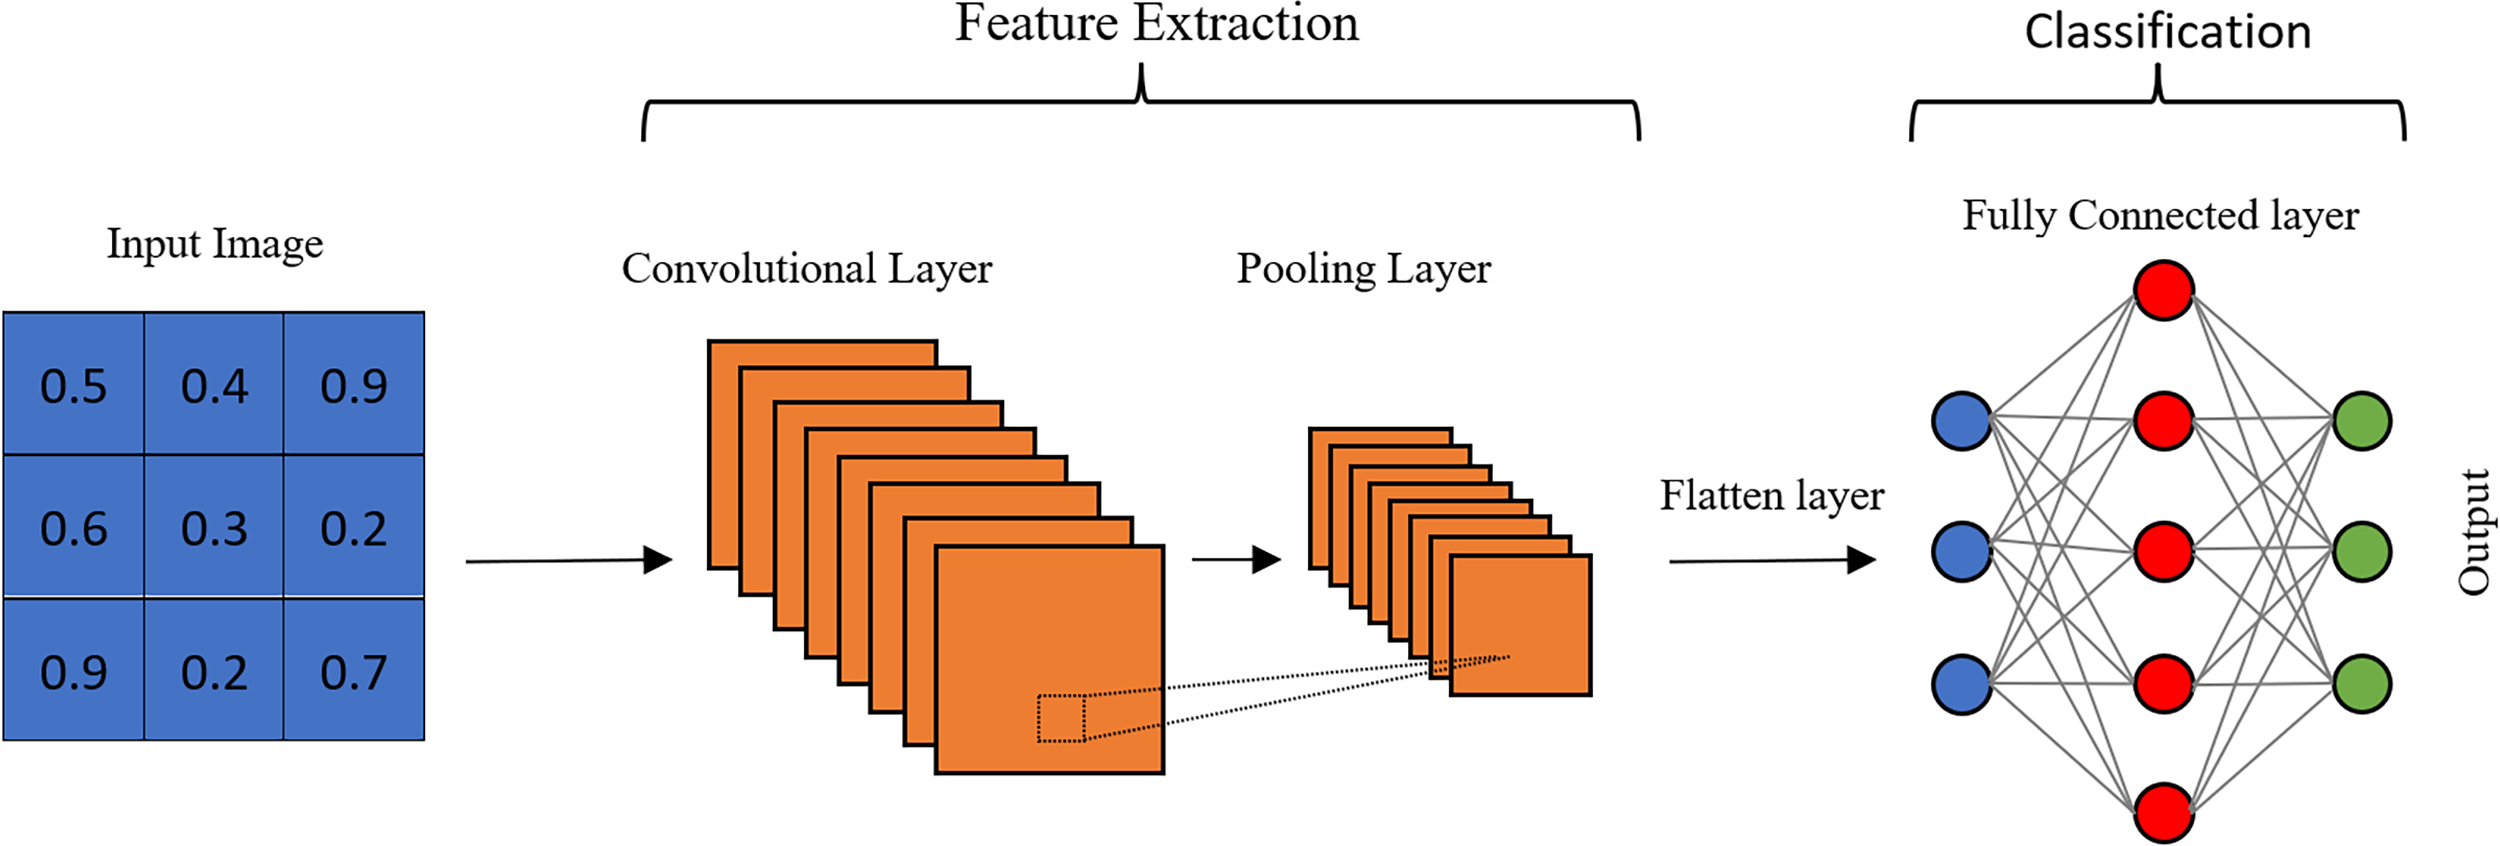

In [27]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [28]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 17s 56ms/step - acc: 0.7397 - loss: 0.5676 - val_acc: 0.8678 - val_loss: 0.3192
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - acc: 0.8810 - loss: 0.2899 - val_acc: 0.8959 - val_loss: 0.2627
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - acc: 0.9059 - loss: 0.2472 - val_acc: 0.8909 - val_loss: 0.2852
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - acc: 0.9168 - loss: 0.1938 - val_acc: 0.9074 - val_loss: 0.2617
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - acc: 0.9356 - loss: 0.1594 - val_acc: 0.9107 - val_loss: 0.2635


In [29]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - acc: 0.9227 - loss: 0.2341
Test Accuracy = 0.9192587733268738


**Predictive System**

Path of the image to be predicted: /content/data/with_mask/with_mask_1232.jpg


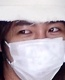

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
[[0.44224474 0.5107016 ]]
1
The person in the image is wearing a mask


In [32]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')